In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("twitchdata-update.csv")
# first 5 rows of twitch data
df.head(5)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [11]:
# summary of non-missing vals in f
print(df.info())

# summary stats for numerical cols in unemployment
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB
None
       Watch time(Minutes)  Stream time(minutes)   Peak viewers  \
count         1.000000e+03           1000.000000    1000.000000   
mean          4.184279e+08         120515.160

In [15]:
# num vals in languages column

print(df['Language'].value_counts())

Language
English       485
Korean         77
Russian        74
Spanish        68
French         66
Portuguese     61
German         49
Chinese        30
Turkish        22
Italian        17
Polish         12
Thai           11
Japanese       10
Czech           6
Arabic          5
Hungarian       2
Slovak          1
Other           1
Greek           1
Finnish         1
Swedish         1
Name: count, dtype: int64


In [19]:
# get num missing vals - 0 , no need to do dropna/fillna
print(df.isna().sum())
# no need to update any dtype after checking
print(df.dtypes)

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64
Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object


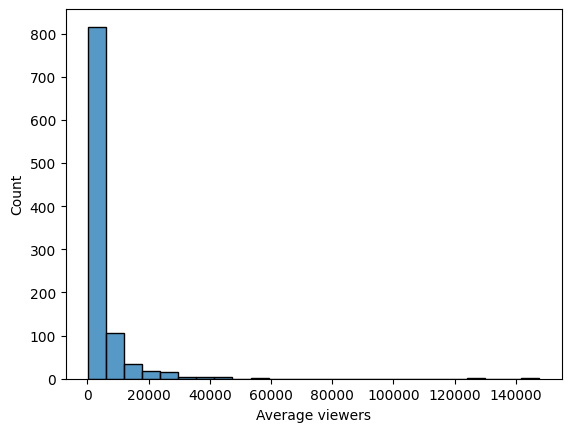

In [35]:
# create histogram of avg viewers
sns.histplot(x='Average viewers', data=df, binwidth=6000)
plt.show()

In [36]:
# validating range
print(df['Watch time(Minutes)'].min(), df['Watch time(Minutes)'].max())

122192850 6196161750


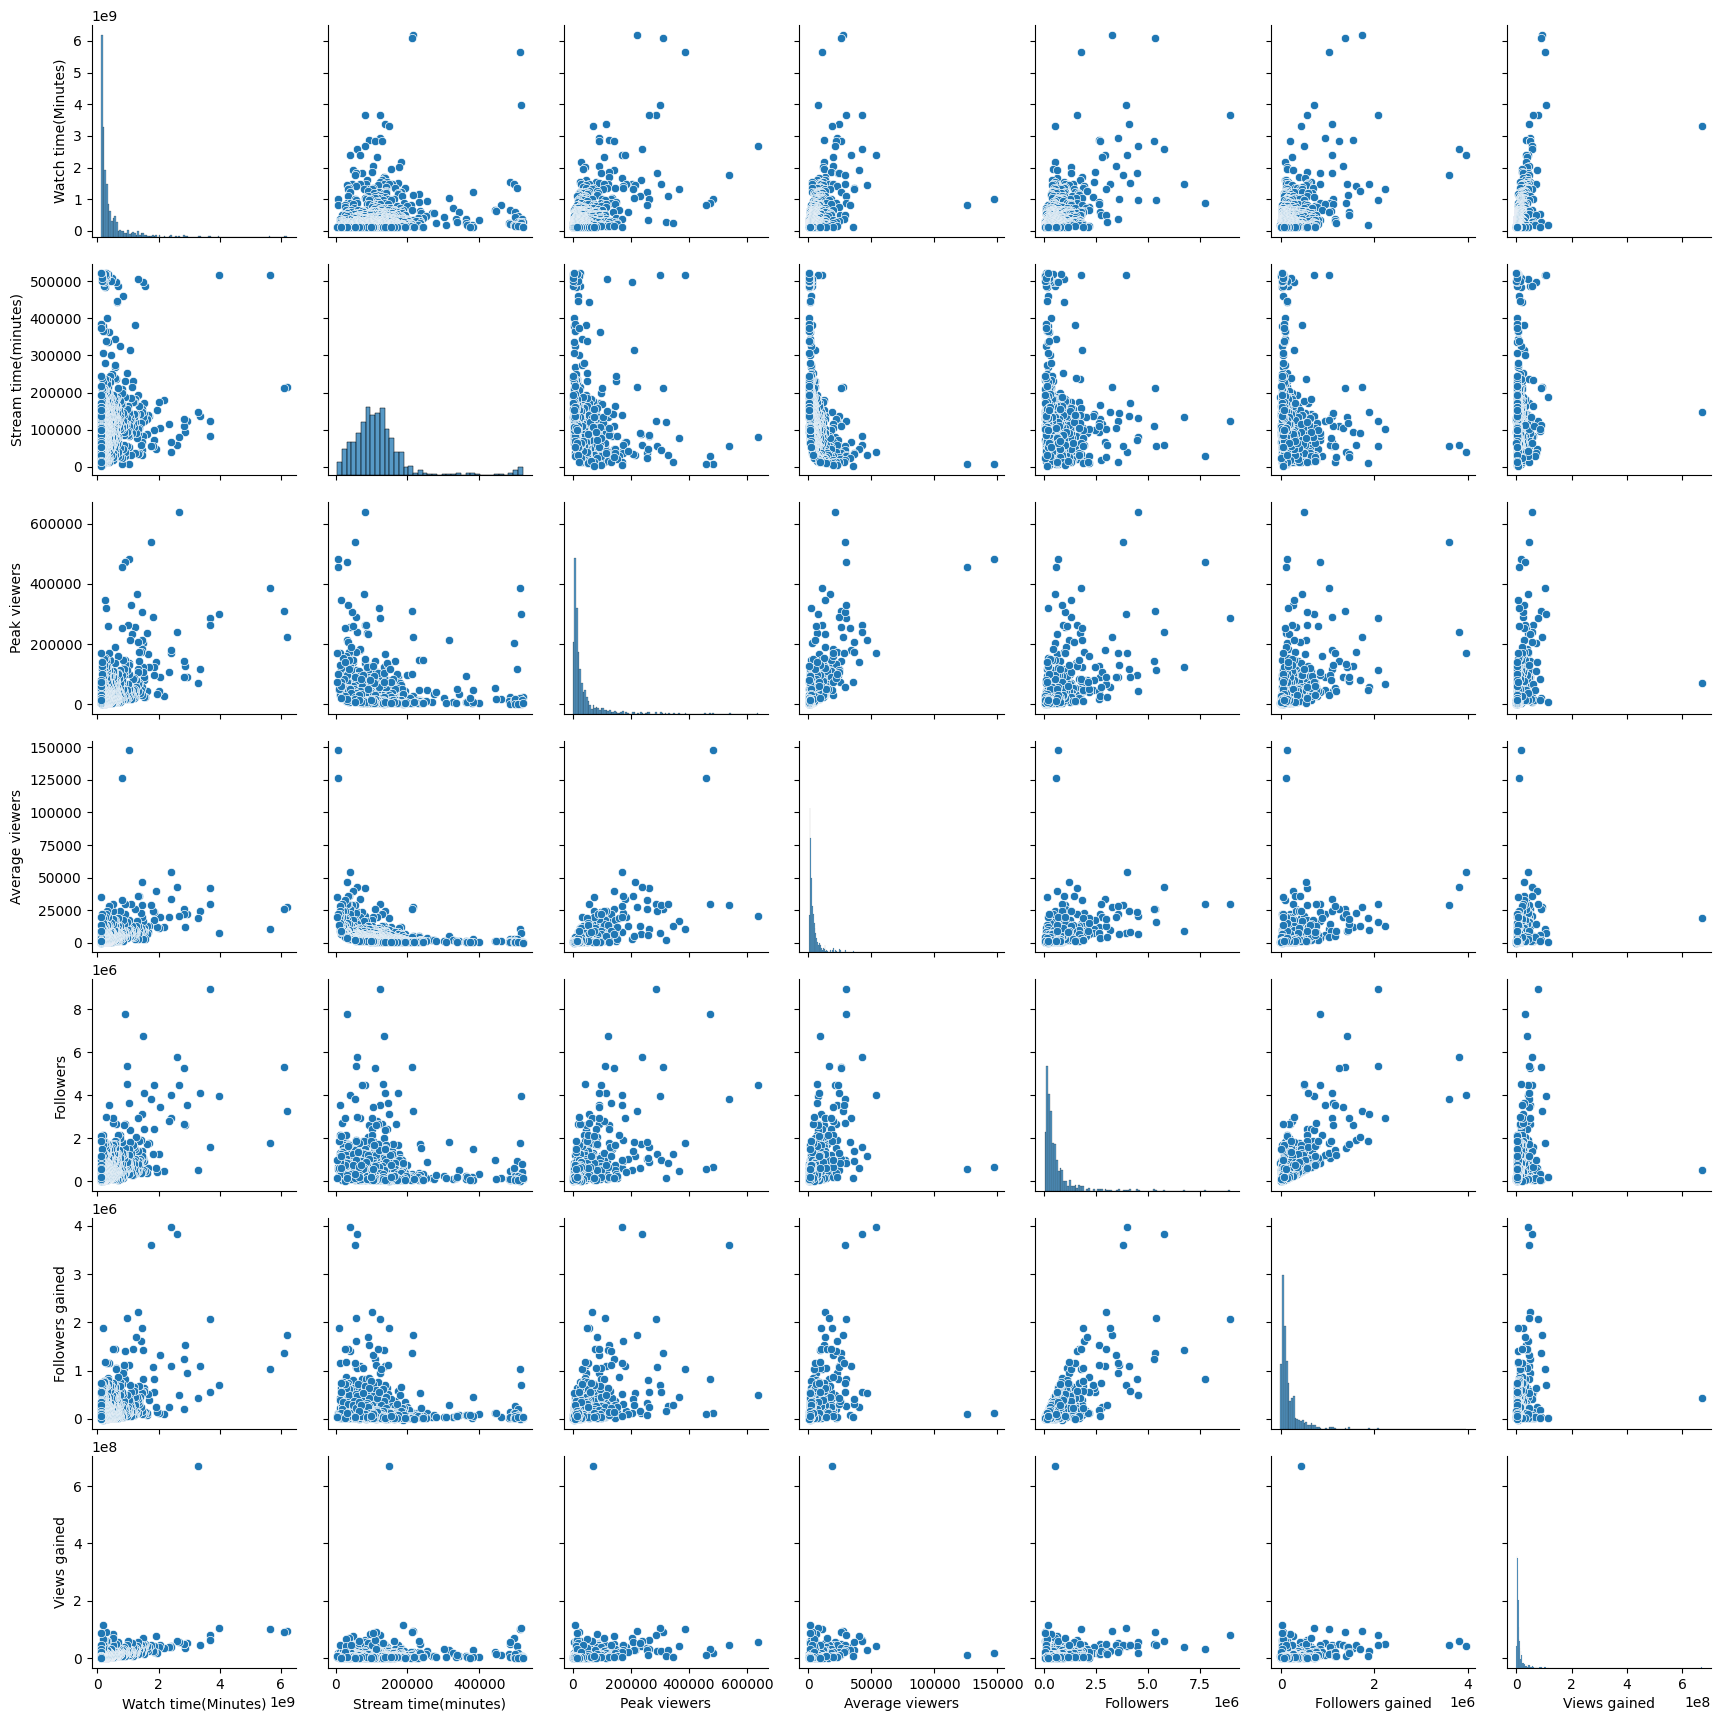

In [38]:
numerical = ["Watch time(Minutes)","Stream time(minutes)","Peak viewers","Average viewers","Followers","Followers gained","Views gained"]
categorical = ["Partnered", "Mature", "Language"]

sns.pairplot(df[numerical])

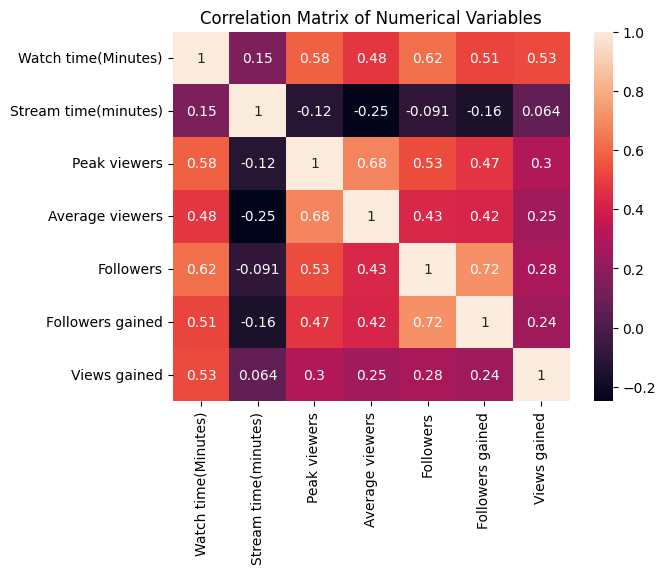

In [44]:
correlation_matrix = df[numerical].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

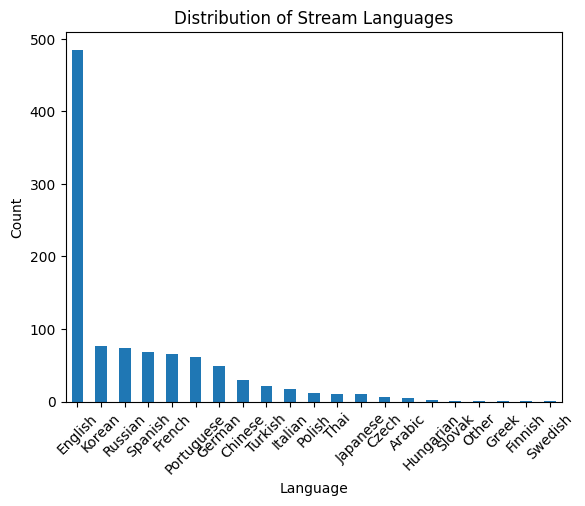

In [45]:
df['Language'].value_counts().plot(kind='bar')
plt.title('Distribution of Stream Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

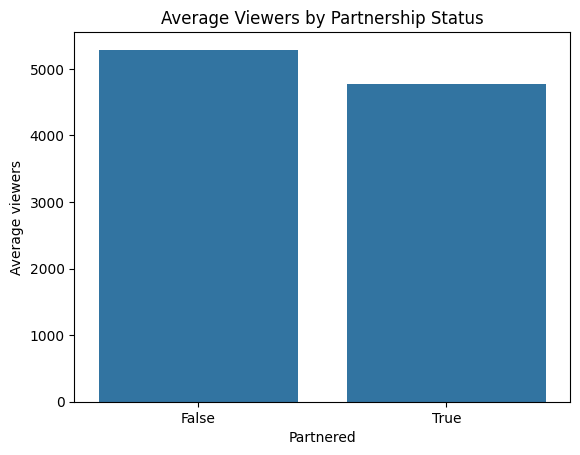

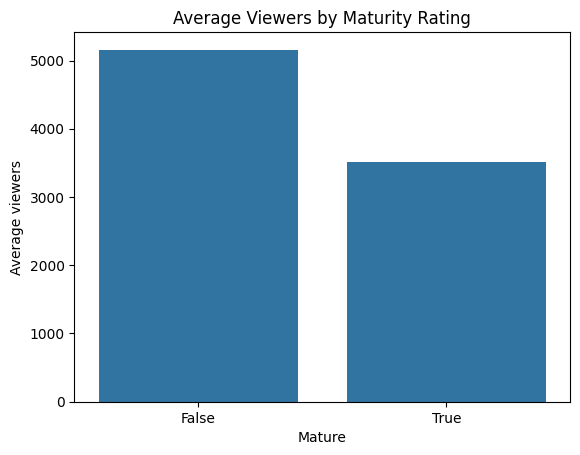

In [48]:
# partnership Analysis
partnership_stats = df.groupby('Partnered')['Average viewers'].mean().reset_index()
sns.barplot(x='Partnered', y='Average viewers', data=partnership_stats)
plt.title('Average Viewers by Partnership Status')
plt.show()

# maturity Rating Analysis
maturity_stats = df.groupby('Mature')['Average viewers'].mean().reset_index()
sns.barplot(x='Mature', y='Average viewers', data=maturity_stats)
plt.title('Average Viewers by Maturity Rating')
plt.show()

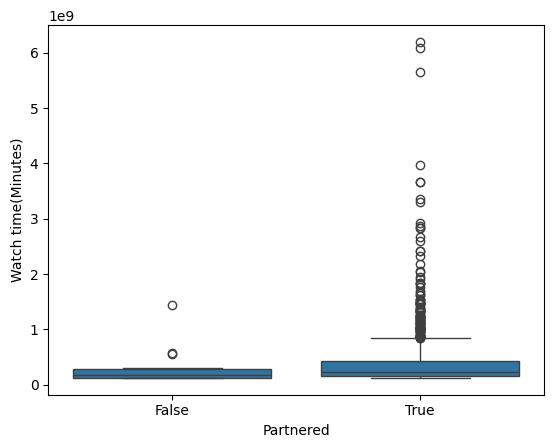

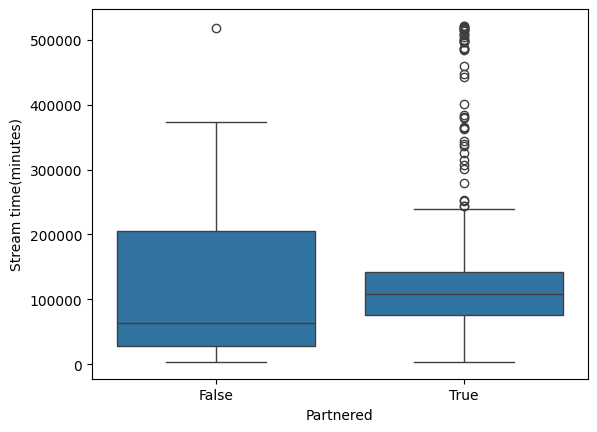

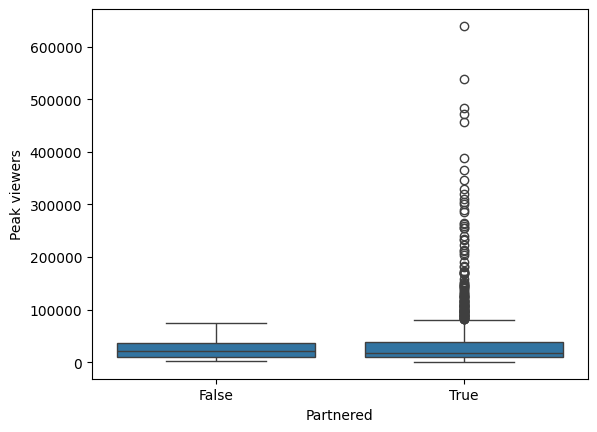

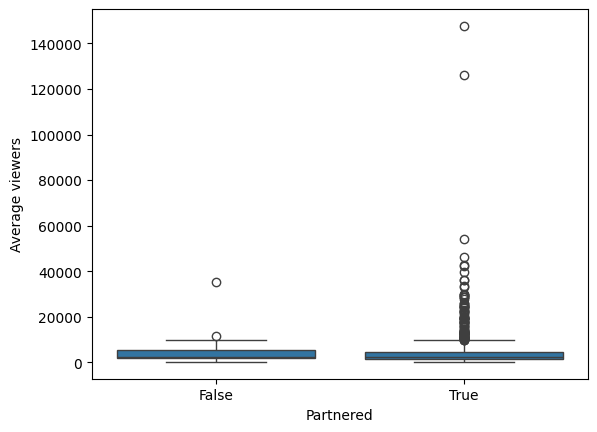

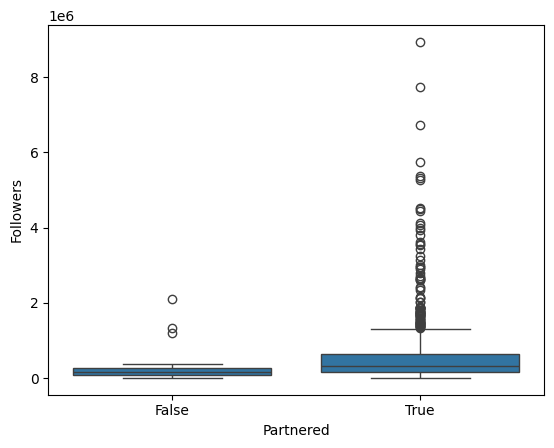

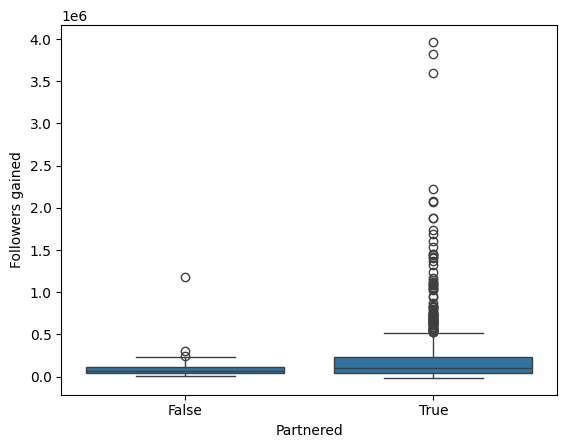

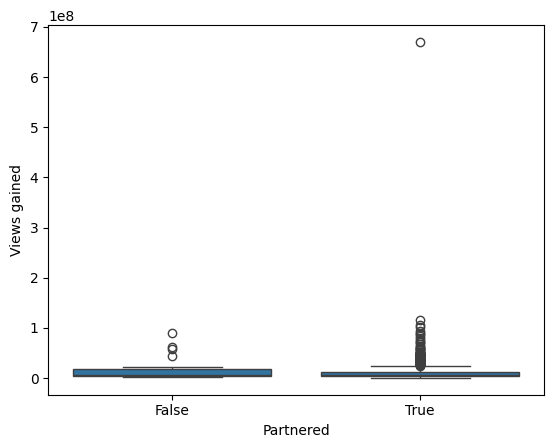

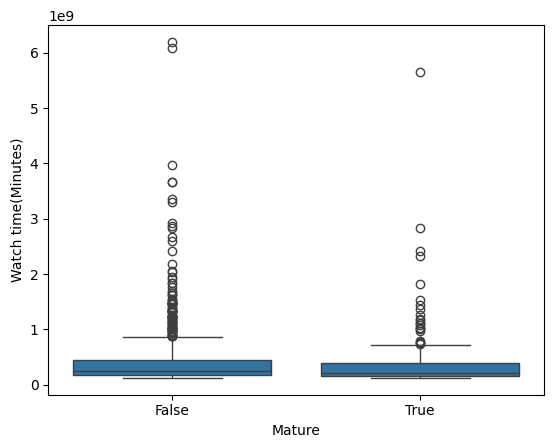

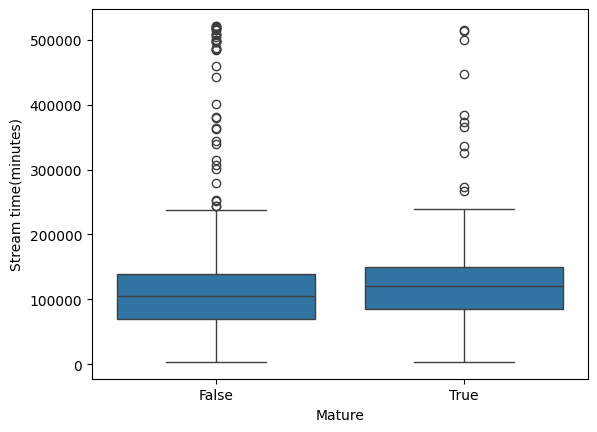

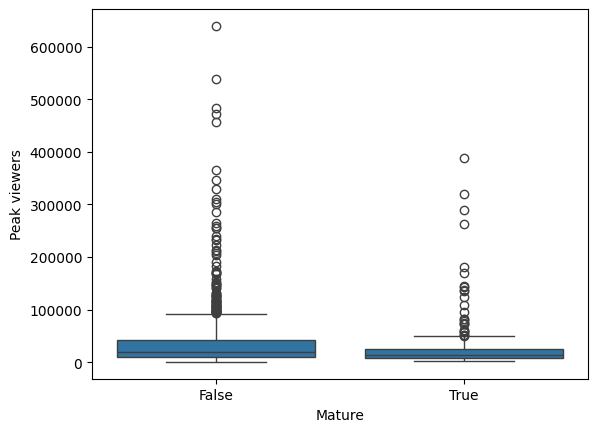

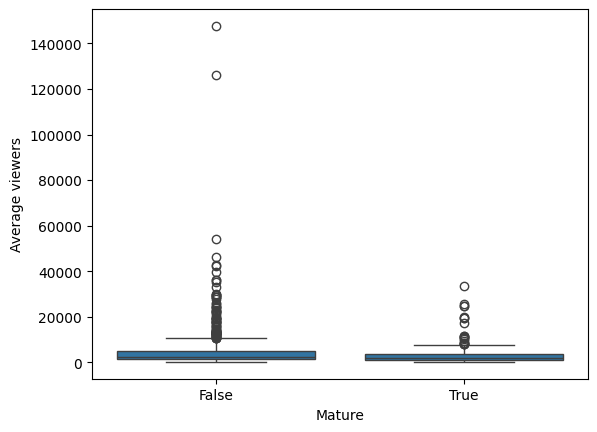

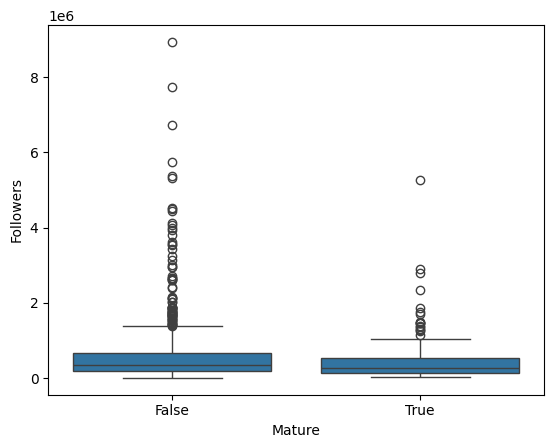

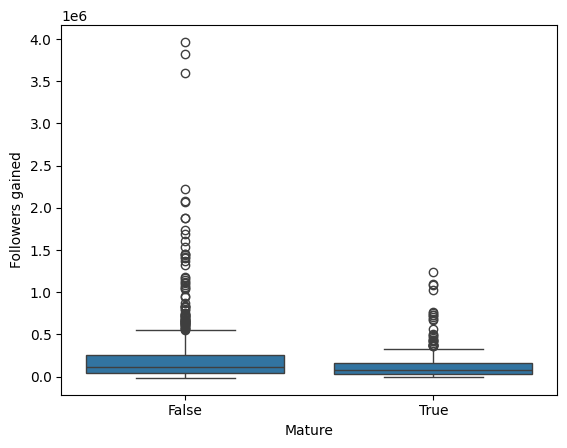

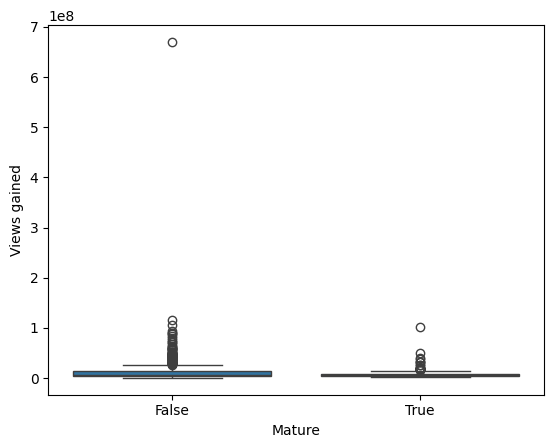

In [66]:
for cat in categorical:
    for num in numerical:
        sns.boxplot(x=cat, y=num, data=df)
        if cat == 'Language':
            plt.xticks(rotation=45)
        plt.show()

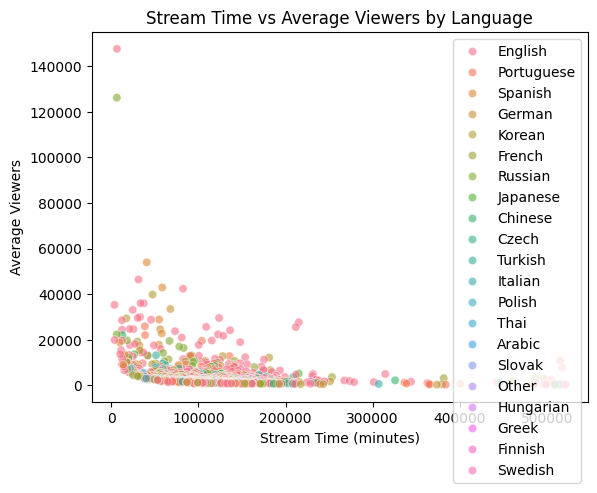

In [59]:
sns.scatterplot(data=df, x='Stream time(minutes)', y='Average viewers',hue='Language',alpha=0.6)
plt.title('Stream Time vs Average Viewers by Language')
plt.xlabel('Stream Time (minutes)')
plt.ylabel('Average Viewers')
plt.legend()
plt.show()

In [56]:
# IQR Analysis for avg viewers
Q1_viewers = df['Average viewers'].quantile(0.25)
Q3_viewers = df['Average viewers'].quantile(0.75)
IQR_viewers = Q3_viewers - Q1_viewers

# calculate outlier bounds
lower_bound_viewers = Q1_viewers - 1.5 * IQR_viewers
upper_bound_viewers = Q3_viewers + 1.5 * IQR_viewers

# identify outliers
outliers_viewers = df[(df['Average viewers'] > upper_bound_viewers) | 
                     (df['Average viewers'] < lower_bound_viewers)]

print("\nInterquartile Range Analysis for Average Viewers:")
print(f"Q1: {Q1_viewers:.2f}")
print(f"Q3: {Q3_viewers:.2f}")
print(f"IQR: {IQR_viewers:.2f}")
print(f"Lower bound: {lower_bound_viewers:.2f}")
print(f"Upper bound: {upper_bound_viewers:.2f}")
print(f"\nNumber of outlier channels: {len(outliers_viewers)}")


Interquartile Range Analysis for Average Viewers:
Q1: 1457.75
Q3: 4786.25
IQR: 3328.50
Lower bound: -3535.00
Upper bound: 9779.00

Number of outlier channels: 100
